In [162]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Read in data from the csv file
df = pd.read_csv('movie data.csv')

In [163]:
# Preview the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [164]:
# Check how many rows there are
orig_row_num = len(df['name'])
print(str(orig_row_num) + ' rows')

7668 rows


In [165]:
# Check for any missing data
for col in df.columns:
    p_missing = np.mean(df[col].isnull()) * 100
    print('missing {}: {}%'.format(col, round(p_missing, 2)))

missing name: 0.0%
missing rating: 1.0%
missing genre: 0.0%
missing year: 0.0%
missing released: 0.03%
missing score: 0.04%
missing votes: 0.04%
missing director: 0.0%
missing writer: 0.04%
missing star: 0.01%
missing country: 0.04%
missing budget: 28.31%
missing gross: 2.46%
missing company: 0.22%
missing runtime: 0.05%


In [166]:
# Drop all rows with missing values from the dataset and check how many rows remain
df = df.dropna()
rem_row_num = len(df['name'])
print(str(orig_row_num - rem_row_num) + ' rows dropped')
print(str(rem_row_num) + ' rows remain')

2247 rows dropped
5421 rows remain


In [167]:
# Check the data types of the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [168]:
# Change the data types of columns where necessary
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [169]:
# Create a column with the correct release years and remove the old year column and released column
df['released_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype('int64')
del df['year']
del df['released']

In [170]:
# Drop all duplicate rows from the dataset
df = df.drop_duplicates()

In [171]:
# View the rows sorted by gross (descending)
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
2434,Philadelphia Experiment II,PG-13,Action,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3681,Ginger Snaps,Not Rated,Drama,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
272,Parasite,R,Horror,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


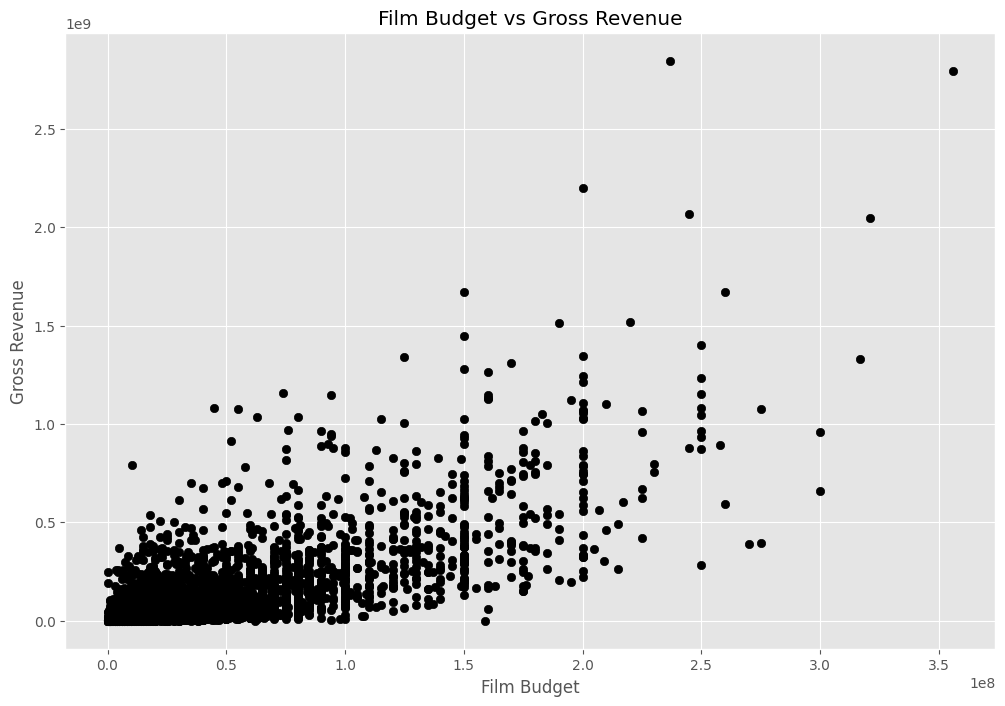

In [172]:
# Build a scatter plot displaying budget vs gross using matplotlib
plt.scatter(x=df['budget'], y=df['gross'], c='black')
plt.title('Film Budget vs Gross Revenue')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue')
plt.show()

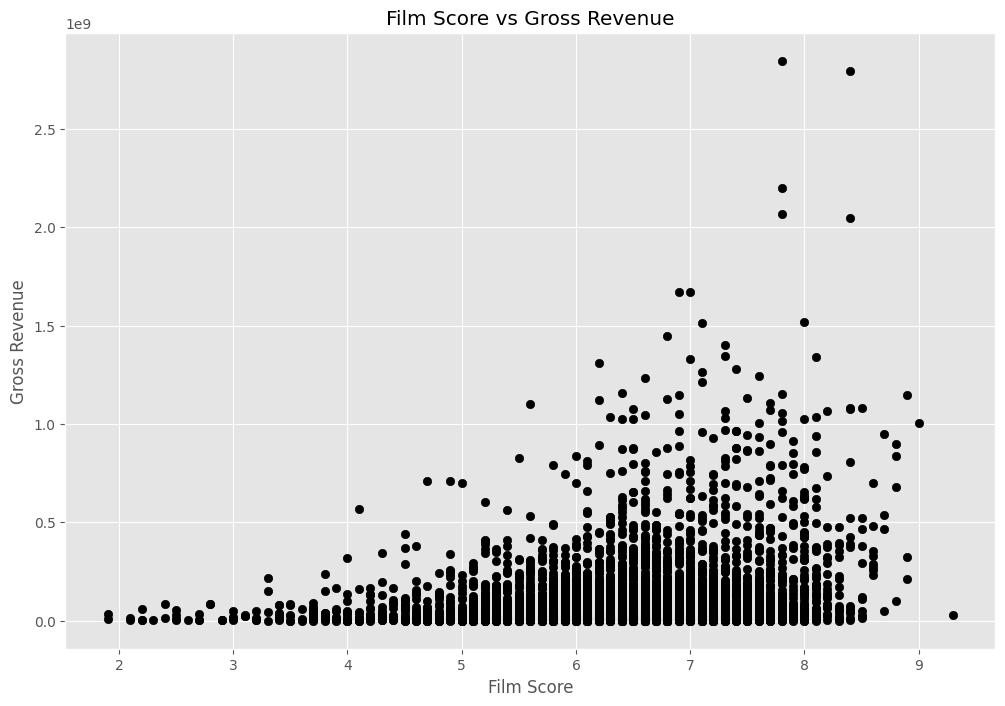

In [173]:
# Build a scatter plot displaying score vs gross using matplotlib
plt.scatter(x=df['score'], y=df['gross'], c='black')
plt.title('Film Score vs Gross Revenue')
plt.xlabel('Film Score')
plt.ylabel('Gross Revenue')
plt.show()

Text(0, 0.5, 'Gross Revenue')

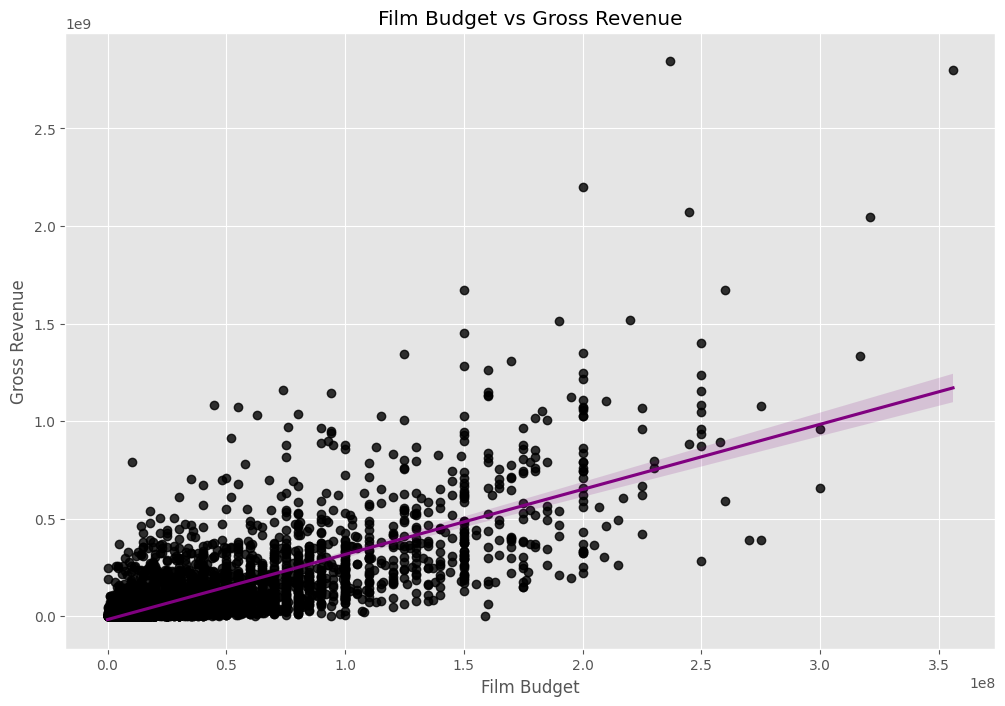

In [174]:
# Build a scatter plot (with regression line) displaying budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'black'}, line_kws={'color':'purple'})
plt.title('Film Budget vs Gross Revenue')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue')

Text(0, 0.5, 'Gross Revenue')

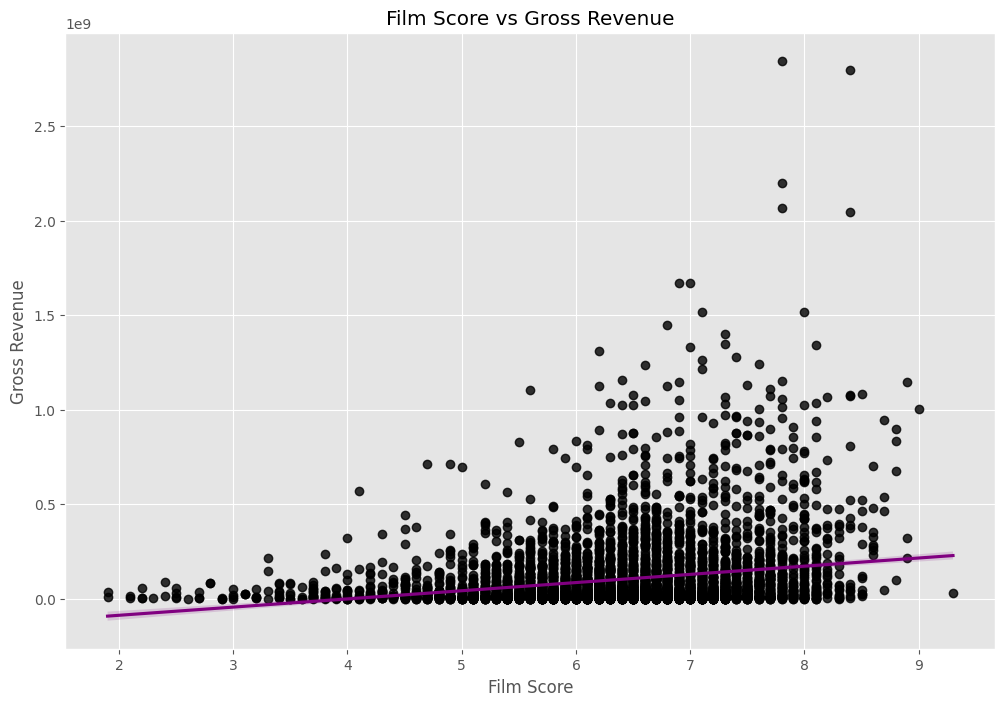

In [175]:
# Build a scatter plot (with regression line) displaying score vs gross using seaborn
sns.regplot(x='score', y='gross', data=df, scatter_kws={'color':'black'}, line_kws={'color':'purple'})
plt.title('Film Score vs Gross Revenue')
plt.xlabel('Film Score')
plt.ylabel('Gross Revenue')

In [176]:
# Look at the correlation between different columns in the dataset (numeric metrics only)
corr_matrix = df.corr(method='pearson', numeric_only=True)
corr_matrix

,score,votes,budget,gross,runtime,released_year
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
released_year,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


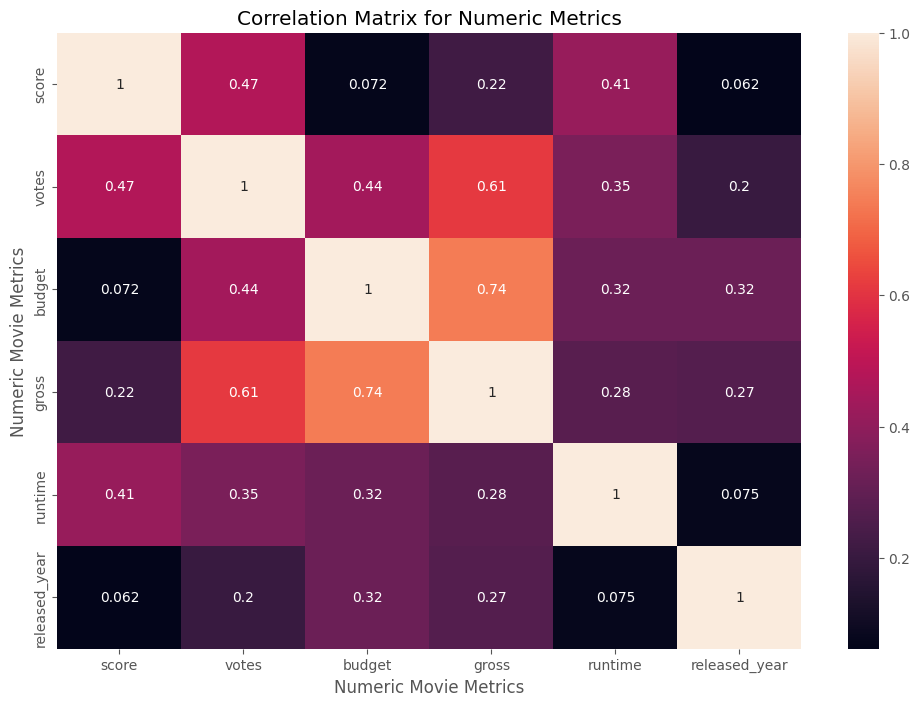

In [177]:
# Create a heatmap displaying the correlation between different columns in the dataset using seaborn (numeric metrics only)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Metrics')
plt.xlabel('Numeric Movie Metrics')
plt.ylabel('Numeric Movie Metrics')
plt.show()

In [178]:
# Narrow down on numeric metrics that have significant correlation
corr_pairs = corr_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values()
high_corr = sorted_corr_pairs[sorted_corr_pairs > .5]
high_corr = high_corr[high_corr != 1]
high_corr

gross   votes     0.614751
votes   gross     0.614751
gross   budget    0.740247
budget  gross     0.740247
dtype: float64

Text(0, 0.5, 'Gross Revenue')

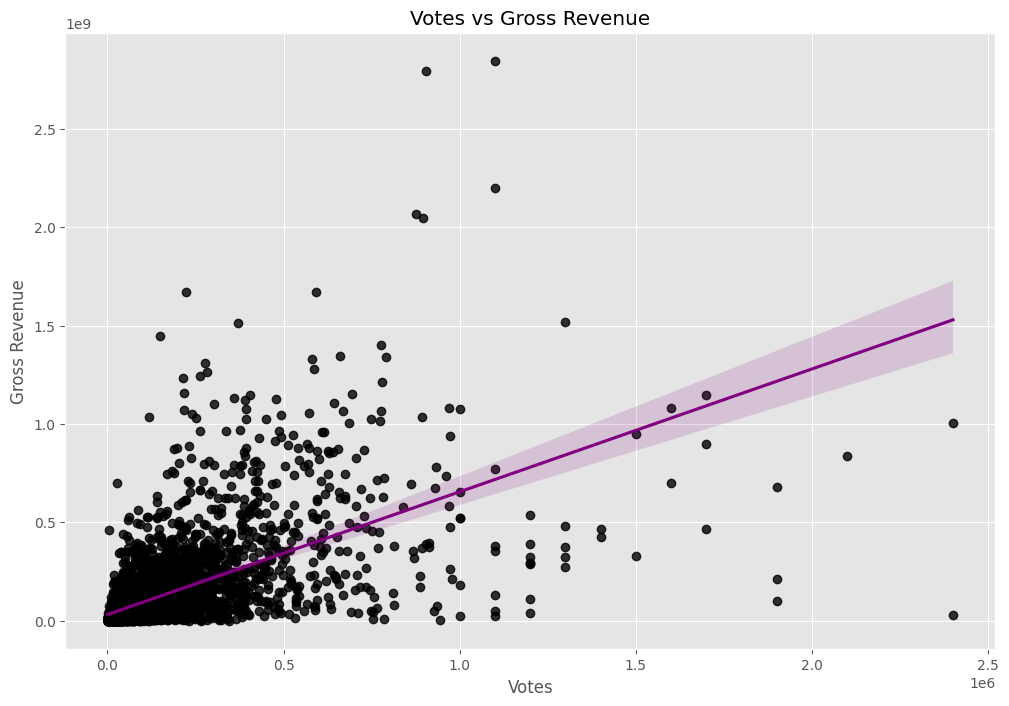

In [179]:
# Build a scatter plot (with regression line) displaying votes vs gross using seaborn
sns.regplot(x='votes', y='gross', data=df, scatter_kws={'color':'black'}, line_kws={'color':'purple'})
plt.title('Votes vs Gross Revenue')
plt.xlabel('Votes')
plt.ylabel('Gross Revenue')

In [180]:
# Perform an ANOVA test and look at eta squared to check company's effect on gross
model = ols('gross ~ C(company)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
SSB = anova_table['sum_sq']['C(company)']
SST = anova_table['sum_sq'].sum()
eta_squared = SSB / SST
print('Eta-squared:', eta_squared)

                  sum_sq      df         F        PR(>F)
C(company)  6.771589e+19  1474.0  1.480681  4.327561e-21
Residual    1.224302e+20  3946.0       NaN           NaN
Eta-squared: 0.3561255831413359


In [181]:
# Perform an ANOVA test and look at eta squared to check star's effect on gross
model = ols('gross ~ C(star)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
SSB = anova_table['sum_sq']['C(star)']
SST = anova_table['sum_sq'].sum()
eta_squared = SSB / SST
print('Eta-squared:', eta_squared)

                sum_sq      df         F        PR(>F)
C(star)   7.882325e+19  1844.0  1.373114  9.884997e-16
Residual  1.113229e+20  3576.0       NaN           NaN
Eta-squared: 0.41454044041647636


In [182]:
# Perform an ANOVA test and look at eta squared to check rating's effect on gross
model = ols('gross ~ C(rating)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
SSB = anova_table['sum_sq']['C(rating)']
SST = anova_table['sum_sq'].sum()
eta_squared = SSB / SST
print('Eta-squared:', eta_squared)

                 sum_sq      df          F        PR(>F)
C(rating)  1.289339e+19     9.0  43.733004  2.305324e-76
Residual   1.772527e+20  5411.0        NaN           NaN
Eta-squared: 0.06780781399906861


In [183]:
# Perform an ANOVA test and look at eta squared to check genre's effect on gross
model = ols('gross ~ C(genre)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
SSB = anova_table['sum_sq']['C(genre)']
SST = anova_table['sum_sq'].sum()
eta_squared = SSB / SST
print('Eta-squared:', eta_squared)

                sum_sq      df          F         PR(>F)
C(genre)  2.264929e+19    14.0  52.215102  2.072223e-137
Residual  1.674968e+20  5406.0        NaN            NaN
Eta-squared: 0.11911521403828121


In [184]:
# Perform an ANOVA test and look at eta squared to check country's effect on gross
model = ols('gross ~ C(country)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
SSB = anova_table['sum_sq']['C(country)']
SST = anova_table['sum_sq'].sum()
eta_squared = SSB / SST
print('Eta-squared:', eta_squared)

                  sum_sq      df         F    PR(>F)
C(country)  3.573466e+18    49.0  2.099427  0.000012
Residual    1.865726e+20  5371.0       NaN       NaN
Eta-squared: 0.018793264662134438
